The column heading variables have the following meanings:

- survival: Survival (0 = no; 1 = yes)
- class: Passenger class (1 = first; 2 = second; 3 = third)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin
- embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat: Lifeboat (if survived)
- body: Body number (if did not survive and body was recovered)

**Importing Packages**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Path

In [5]:
path = "Z:/Career/DataScientist/UPx/Session/2017-09-09_&_10_Week3_12_Session_5_&_6_ML_LogReg_Jupy_DecisionTree/"

Reading Titanic Train and Test

In [6]:
titanic_train = pd.read_csv(path + 'titanic.csv')
titanic_test = pd.read_csv(path + 'titanic_test.csv')

## 1. Data at First Look

In [7]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
trainCols = titanic_train.columns
trainCols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
print(titanic_train.shape, titanic_train.ndim)

(891, 12) 2


12 Column includes 'Survived' as well which has to be Predicted and is Response variable

In [366]:
np.round(titanic_train.describe(),4)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


In [367]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
testCols = titanic_test.columns
testCols

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
print(titanic_test.shape, titanic_test.ndim)

(418, 11) 2


11 Rows in TEST dataset shows that Response variable i.e. 'Survived' is missing

** Slice and Dice**

In [370]:
trainCols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
print(titanic_train.Survived.value_counts().sort_index())
print(titanic_train.Pclass.value_counts().sort_index())
print(titanic_train.Sex.value_counts().sort_index())
print(titanic_train.SibSp.value_counts().sort_index())
print(titanic_train.Parch.value_counts().sort_index())
print(titanic_train.Embarked.value_counts().sort_index())

0    549
1    342
Name: Survived, dtype: int64
1    216
2    184
3    491
Name: Pclass, dtype: int64
female    314
male      577
Name: Sex, dtype: int64
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64
C    168
Q     77
S    644
Name: Embarked, dtype: int64


### 1.1) Visualizing by Grouping basis Passanger-CLass, Sex & Age

Let's check the **mean/median of SURVIVED**

In [373]:
titanic_train.Survived.mean()

0.3838383838383838

Only **38% survived** which is not good, this should be basis Passanger-Class.
Let's check how this is defined

In [374]:
titanic_train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


Higher Class (1) does have 62% survival, while only 25% survival is for Lower Class

Also - Fare is higher for Higher Class

Let's further break this in terms of SEX

In [375]:
class_sex_grouping = titanic_train.groupby(['Sex','Pclass']).mean()
class_sex_grouping

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

It is clear now that 96% Females from Class 1 got survived while only 50% Females from Lower Class got survived

Shows that priority was given to Females from Higher Classes (1 & 2)

From Males, even priority was given for Higher Class males, 36% males got saved while not even half of ths number were saved from Lower Class i.e. only 13%

**Let's plot this**

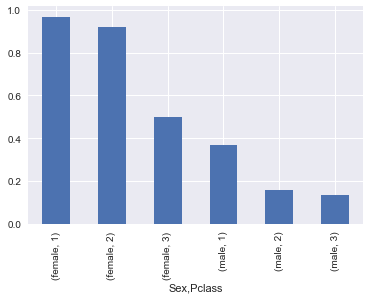

In [376]:
class_sex_grouping.Survived.plot.bar()

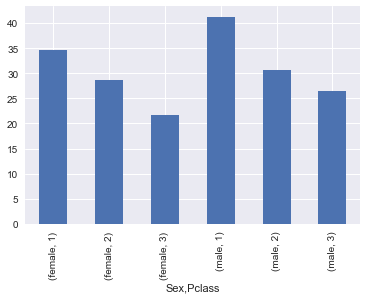

In [377]:
class_sex_grouping.Age.plot.bar()

Let's check if **'Children, Women & OLD People First'** were saved first by keeping them in BINS of 10 basis their Age from 0 to 90

Later, grouping this Binned-data by Age into SEX 

In [378]:
group_by_age = pd.cut(titanic_train.Age, np.arange(0,90,10)) # Age wise division 0 to 90 in bins of 10 have been grouped

age_sex_grouping = titanic_train.groupby(['Sex',group_by_age]).mean() # Sex and basis this Age-group for mean is found
age_sex_grouping

PassengerId  Survived    Pclass        Age     SibSp  \
Sex    Age                                                              
female (0, 10]    421.838710  0.612903  2.677419   4.596774  1.483871   
       (10, 20]   412.478261  0.739130  2.260870  16.793478  0.652174   
       (20, 30]   441.419753  0.753086  2.135802  25.382716  0.481481   
       (30, 40]   416.800000  0.836364  1.818182  35.327273  0.545455   
       (40, 50]   500.709677  0.677419  1.838710  45.548387  0.387097   
       (50, 60]   503.571429  0.928571  1.214286  55.142857  0.642857   
       (60, 70]   530.000000  1.000000  1.666667  62.666667  0.333333   
       (70, 80]          NaN       NaN       NaN        NaN       NaN   
male   (0, 10]    439.303030  0.575758  2.606061   3.959697  2.181818   
       (10, 20]   471.115942  0.144928  2.710145  17.666667  0.550725   
       (20, 30]   421.758389  0.154362  2.523490  25.446309  0.234899   
       (30, 40]   497.230000  0.230000  2.240000  34.900000  0.280000   
       (40, 50]   473.800000  0.218182  1.963636  45.272727  0.363636   
       (50, 60]   422.928571  0.142857  1.678571  54.767857  0.142857   
       (60, 70]   409.642857  0.071429  1.500000  64.142857  0.142857   
       (70, 80]   438.200000  0.200000  1.800000  73.300000  0.000000   

                    Parch       Fare  
Sex    Age                            
female (0, 10]   1.451613  27.849326  
       (10, 20]  0.500000  40.659063  
       (20, 30]  0.543210  41.563991  
       (30, 40]  0.654545  62.090529  
       (40, 50]  1.000000  56.868823  
       (50, 60]  0.428571  69.522321  
       (60, 70]  0.000000  55.848600  
       (70, 80]       NaN        NaN  
male   (0, 10]   1.393939  32.862879  
       (10, 20]  0.318841  22.109843  
       (20, 30]  0.073826  21.099745  
       (30, 40]  0.250000  31.719164  
       (40, 50]  0.109091  32.310911  
       (50, 60]  0.250000  32.401043  
       (60, 70]  0.428571  43.781250  
       (70, 80]  0.000000  25.936680

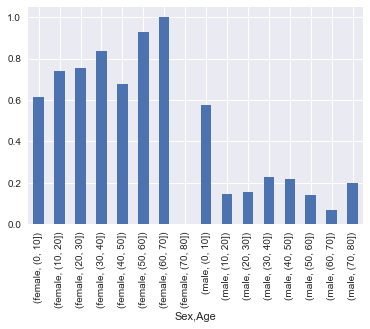

In [379]:
age_sex_grouping.Survived.plot.bar()

1 thing is clear here that **OLDER Women b/w 50-70 years of age were saved on priority**

Female Kids till **10 years of age had 60% survival**, while **Female Kids/teens b/w 10 to 20 had almost 75% survival**

Next is **Females in their 30s were saved with 82% survival**

In Males, only kids b/w/ 1 to 10 years of Age were saved somewhat close to 60%

<font color='blue'><b>Few Conclusion basis simple Analysis</b></font>

- Chances of <u>Survival are very high</u> for **Older Women > 50 yrs of age**, that too if you are in HIGHER Class
- Next is **Females in their 30s** as they would be carrying Kids, while **Femals Kids b/w 1 to 10** have slightly <u>better chances of survival</u> than **Male Kids in same age range**
- Even if you are **Female b/w 10-20 years of Age**, chances of survival are very high compared to **Males in same age range**
- Overall if you are **Female** <u>chances of survival are more than 50% irrespective of Age</u>

## 2. Preparing the Data

In [380]:
titanic_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [381]:
titanic_test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

### 2.1) Relevant variables only
Most of the details as missing for Age, Cabin, Embarked. 

Also, Cabin/Ticket and other such variables are not relevant

In [384]:
#titanic_train.drop(['Ticket','Cabin'], axis=1)

Sex has to be made Categorical i.e. if male, 0 else 1

2 ways to do the same :

- By np.where()
- By lambda function

In [13]:
#Using np.where()
titanic_train.Sex = np.where(titanic_train.Sex == 'male', 0, 1)
titanic_train.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

**Re-converting to same old file before applying lambda**

In [14]:
titanic_train = pd.read_csv(path + 'titanic.csv')

In [15]:
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [16]:
# Droppng again Un-necessary Variables
titanic_train = titanic_train.drop(['Ticket','Cabin'], axis=1)

In [17]:
titanic_train.shape
# 2 Columns have been removed now, only 10 remains now from which 1 is response

(891, 10)

In [18]:
#Using lambda function to convert if Sex = male, 0 else 1
titanic_train.Sex = titanic_train.Sex.apply(lambda Sex: 0 if Sex == 'male' else 1)

In [19]:
titanic_train.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

### 2.2) Missing Value treatment using <u> Imputer </u>

**To know which Column have NaN/Missing Value**

In [47]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Age and Embarked does have missing values.

** Importing necessary package**

In [73]:
from sklearn.preprocessing import Imputer

In [74]:
imp = Imputer(missing_values='NaN', axis=0, strategy='mean')

In [75]:
age = pd.DataFrame(titanic_train.Age)
print(type(age), age.ndim, age.shape)

<class 'pandas.core.frame.DataFrame'> 2 (891, 1)


In [76]:
age = pd.DataFrame(imp.fit_transform(age))
age.isnull().any()

0    False
dtype: bool

In [77]:
print(titanic_train.columns)
print(titanic_train.isnull().sum())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In [78]:
# We shall consider requried columns from this as features for its values only as Numpy Array 
# and then apply this IMPUTER for NAN values
columns = ['Pclass','Sex','Age','SibSp','Fare']
features = titanic_train[columns].values  # this will be X
print(type(features)) # this is Numpy Array
print(features) # As we know that Age does have NaN which needs to be fitted with Imputer

<class 'numpy.ndarray'>
[[  3.       0.      22.       1.       7.25  ]
 [  1.       1.      38.       1.      71.2833]
 [  3.       1.      26.       0.       7.925 ]
 ..., 
 [  3.       1.          nan   1.      23.45  ]
 [  1.       0.      26.       0.      30.    ]
 [  3.       0.      32.       0.       7.75  ]]


In [79]:
Y = targets = lables = titanic_train.Survived.values # this will be Numpy Array
print(type(Y))
print(np.count_nonzero(Y))
print(titanic_train.Survived.value_counts())
# Just checked that correct 1 and 0 have been passed in Y

<class 'numpy.ndarray'>
342
0    549
1    342
Name: Survived, dtype: int64


**For features as X, will treat this for NaN values by passing mean**

In [80]:
imp = Imputer(strategy='mean', axis=0, missing_values='NaN') # for NaN as missing value, replace with mean for all values

In [81]:
X = imp.fit_transform(features) # applying Imputer on features
X

array([[  3.        ,   0.        ,  22.        ,   1.        ,   7.25      ],
       [  1.        ,   1.        ,  38.        ,   1.        ,  71.2833    ],
       [  3.        ,   1.        ,  26.        ,   0.        ,   7.925     ],
       ..., 
       [  3.        ,   1.        ,  29.69911765,   1.        ,  23.45      ],
       [  1.        ,   0.        ,  26.        ,   0.        ,  30.        ],
       [  3.        ,   0.        ,  32.        ,   0.        ,   7.75      ]])

## 3) Creating Decision-Tree

### 3.1) Importing necessary package for this

In [82]:
from sklearn import tree

### 3.2) Creating first Tree with DecisionTreeClassifier as function with max_depth as 3 and critera as Entropy

In [83]:
# to create first tree with depth as 3 and criteris being entropy
my_tree_one = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')

### 3.3) Fitting X and Y in this Decision Tree & checking feature-importance + score of this tree

In [84]:
# fitting X and Y in this tree
my_tree_one = my_tree_one.fit(X, Y)

In [85]:
# checking feature-importance and score with this tree
print(my_tree_one.feature_importances_)
print(my_tree_one.score(X,Y))

[ 0.18665493  0.5670424   0.09423074  0.02876762  0.12330431]
0.822671156004


**We got 82.26 as Score** which is not bad and below is the mapping of **Variables used with their importance**

In [86]:
list(zip(columns, my_tree_one.feature_importances_))

[('Pclass', 0.18665492885980678),
 ('Sex', 0.56704239647481336),
 ('Age', 0.094230740909325178),
 ('SibSp', 0.028767623480642681),
 ('Fare', 0.1233043102754121)]

### 3.4) Will see this in a tree in graphic form as same is exported to DOT file : also BAT file works

In [88]:
# checking the basic help for this
tree.export_graphviz?

In [407]:
with open?

In [89]:
with open('titanic.bat', 'w') as f:
    tree.export_graphviz(my_tree_one, feature_names=columns, out_file=f)

In [410]:
with open("titanic.dot", 'w') as f:
    f = tree.export_graphviz(my_tree_one, feature_names=columns, out_file=f)

#### Need to check this tree @ http://webgraphviz.com/  to visualize the tree

### 3.5) Will be working basis same on "TEST-CSV file"

In [90]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [437]:
# checing all distribution w.r.t. mean, median
titanic_test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [91]:
titanic_test.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [92]:
# Sex to be changed to Categorical if male, sex = 0 else 1
# Using Lambda function

titanic_test.Sex = titanic_test.Sex.apply(lambda Sex: 0 if Sex == 'male' else 1)
titanic_test.Sex.value_counts()

0    266
1    152
Name: Sex, dtype: int64

Reading back test file

In [98]:
titanic_test = pd.read_csv(path + 'titanic_test.csv')

In [99]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [428]:
# Sex in 0 or 1 again
# Using np.where()

titanic_test.Sex = np.where(titanic_test.Sex == 'male',0,1)
titanic_test.Sex.value_counts()

0    266
1    152
Name: Sex, dtype: int64

**Age, Cabin does have NULL values**

In [105]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [106]:
columns

['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']

In [107]:
# taking these columns again in features for test file and considering IMPUTER to treat for missing values
# will be changing to NP.NDARRY first by taking only values for these columns

features_test =  titanic_test[columns].values # this will be X for test
features_test

array([[  3.    ,   0.    ,  34.5   ,   0.    ,   7.8292],
       [  3.    ,   1.    ,  47.    ,   1.    ,   7.    ],
       [  2.    ,   0.    ,  62.    ,   0.    ,   9.6875],
       ..., 
       [  3.    ,   0.    ,  38.5   ,   0.    ,   7.25  ],
       [  3.    ,   0.    ,      nan,   0.    ,   8.05  ],
       [  3.    ,   0.    ,      nan,   1.    ,  22.3583]])

In [108]:
imp

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [109]:
X_test = imp.fit_transform(features_test)
X_test 
# NaN is replaced with mean
# for Age, mean being 30.27259036 has been changed there

array([[  3.        ,   0.        ,  34.5       ,   0.        ,   7.8292    ],
       [  3.        ,   1.        ,  47.        ,   1.        ,   7.        ],
       [  2.        ,   0.        ,  62.        ,   0.        ,   9.6875    ],
       ..., 
       [  3.        ,   0.        ,  38.5       ,   0.        ,   7.25      ],
       [  3.        ,   0.        ,  30.27259036,   0.        ,   8.05      ],
       [  3.        ,   0.        ,  30.27259036,   1.        ,  22.3583    ]])

In [110]:
titanic_test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [111]:
# Checking again DecisionTree worked with my_tree_one
my_tree_one

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [112]:
# Using this DecisionTree to PREDICT for X_test
pred_test = my_tree_one.predict(X_test)
pred_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

## 4) Creating 'Confusion Matrix'

### 4.1) Predicting 'Survival' for X from TITANIC-Train file via my_tree_one

In [113]:
pred_tree_one = my_tree_one.predict(X)
print(pred_tree_one.shape) # total values
print(np.count_nonzero(pred_tree_one)) # this will give all 1's for pred

(891,)
302


In [114]:
print(titanic_train.Survived.value_counts())
print(np.count_nonzero(Y))

0    549
1    342
Name: Survived, dtype: int64
342


**Actual Survived were 342, however basis PREDICTED - 302 Survives**

### 4.2) Creating & Printing Confusion Matrix

Importing METRICS from sklearn to use CONFUSION_MATRIX

In [115]:
from sklearn import metrics

In [116]:
df_confusion_one = metrics.confusion_matrix(Y, pred_tree_one)
df_confusion_one

array([[490,  59],
       [ 99, 243]], dtype=int64)

In [117]:
def plot_confusion_matrix (df_confusion, cmap = plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

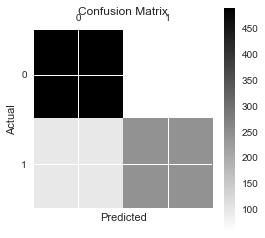

In [118]:
plot_confusion_matrix(df_confusion_one)

### 4.3) Let's check the behavior in confusion matrix if tree-depth is changed

In [119]:
# checking what was actually created for my_tree_one
my_tree_one

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [121]:
# trying with depth = 5 and min_samples_split = 5
my_tree_two = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)
my_tree_two

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Fitting for X and Y**

In [122]:
my_tree_two = my_tree_two.fit(X,Y)

**Checking Score & Features-coefficients**

In [123]:
print('Score for tree-two:',my_tree_two.score(X,Y))
print('Score for tree-one:' ,my_tree_one.score(X,Y))

print('Feature for tree-two:',my_tree_two.feature_importances_)
print('Feature for tree-one:',my_tree_one.feature_importances_)

Score for tree-two: 0.848484848485
Score for tree-one: 0.822671156004
Feature for tree-two: [ 0.15352545  0.46639776  0.18934617  0.0315988   0.15913181]
Feature for tree-one: [ 0.18665493  0.5670424   0.09423074  0.02876762  0.12330431]


Score is now **84.84%** which is better than tree-one, also the feature-importance has turned better with depth=5 and split=5

In [124]:
list(zip(columns, my_tree_two.feature_importances_))

[('Pclass', 0.15352545377549784),
 ('Sex', 0.4663977627621464),
 ('Age', 0.18934617070210216),
 ('SibSp', 0.031598804717682928),
 ('Fare', 0.15913180804257054)]

**Predicting Survivals for X with this new tree-two**

In [125]:
pred_tree_two = my_tree_two.predict(X)
np.count_nonzero(pred_tree_two)

305

Slightly better predictions, since <u>earlier 302 was predicted and now, it is 305</u>

**Creating Confusion-Matrix and then plotting it**

In [126]:
df_confusion_two = metrics.confusion_matrix(Y, pred_tree_two)
df_confusion_two

array([[500,  49],
       [ 86, 256]], dtype=int64)

In [127]:
# This is different than what we got earlier with tree-one
df_confusion_one

array([[490,  59],
       [ 99, 243]], dtype=int64)

**TP = True Positive** is now improved to **256 from earlier being 243**

**TN = True Negative** is also now better to **500 from earlier being 490**

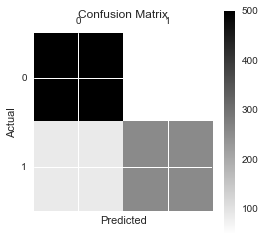

In [128]:
# Plotting this new tree-two confusion matrix
plot_confusion_matrix(df_confusion_two)

**What happens to TP, TN when depth = 10**

In [129]:
my_tree_three = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=1)
my_tree_three

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

<font color='blue'><b>By Default it took <u>Gini Index</u> as criteria</font>

In [130]:
# Fitting
my_tree_three = my_tree_three.fit(X,Y)

In [131]:
# Score & Feature-Importance
print(my_tree_three.score(X,Y))
print(my_tree_three.feature_importances_)
list(zip(columns, my_tree_three.feature_importances_))

0.901234567901
[ 0.14536535  0.42813312  0.16450653  0.04933616  0.21265884]


[('Pclass', 0.1453653513724415),
 ('Sex', 0.42813311784361485),
 ('Age', 0.16450653126589407),
 ('SibSp', 0.049336160517965473),
 ('Fare', 0.21265883900008414)]

In [132]:
# Predict
pred_tree_three = my_tree_three.predict(X)
np.count_nonzero(pred_tree_three)

286

In [133]:
print('Survived Predicted by Tree-One:',np.count_nonzero(pred_tree_one))
print('Survived Predicted by Tree-two:',np.count_nonzero(pred_tree_two))

Survived Predicted by Tree-One: 302
Survived Predicted by Tree-two: 305


Basis above, now with Gini-Index & Depth=10, Predicted Survived is 286 which is less that what previous two predicted with

In [134]:
# Creating Confusion Matrix
df_confusion_three = metrics.confusion_matrix(Y, pred_tree_three)
df_confusion_three

array([[533,  16],
       [ 72, 270]], dtype=int64)

In [135]:
print('Confusion Matrix One:')
print(df_confusion_one)
print('Confusion Matrix Two:')
print(df_confusion_two)

Confusion Matrix One:
[[490  59]
 [ 99 243]]
Confusion Matrix Two:
[[500  49]
 [ 86 256]]


In this case of three-Confusion Matrix, **TP = 270 & TN = 533** which is MORE than what other two matrixes predicted

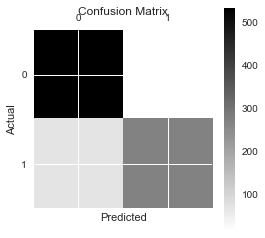

In [136]:
# Plotting the same
plot_confusion_matrix(df_confusion_three)

## 5) RANDOM FOREST

### 5.1) Import Package and library

In [137]:
from sklearn.ensemble import RandomForestClassifier

### 5.2) Creating Random-Forest

By default, **criteria is Gini-Index** and there will be <u>100 Decision Trees</u> here

In [138]:
forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

### 5.3) Fitting ths Forest on X and Y

In [139]:
my_forest_one = forest.fit(X,Y)

### 5.4) Score & Feature-Importance

In [140]:
print(my_forest_one.score(X,Y))
print(my_forest_one.feature_importances_)
print(list(zip(columns, my_forest_one.feature_importances_)))

0.933782267116
[ 0.11670948  0.33433272  0.23873683  0.05412548  0.25609549]
[('Pclass', 0.11670948208928048), ('Sex', 0.33433272005385889), ('Age', 0.23873683216023239), ('SibSp', 0.054125475627007286), ('Fare', 0.25609549006962101)]


Score got improved to **93.3** from earlier single Decision Tree, be it, one - two or three

In [142]:
print(my_tree_three.score(X,Y))
print(my_tree_one.score(X,Y))
print(my_tree_two.score(X,Y))

0.901234567901
0.822671156004
0.848484848485


### 5.5) Predict for X

In [143]:
pred_RF_one = my_forest_one.predict(X)
np.count_nonzero(pred_RF_one)

307

In [144]:
titanic_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<u>**307** has been predicted to be survived</u> basis this while **Actual Survived is 342**

### 5.6) Creating & Plotting Confusion Matrix

In [145]:
df_confusion_RF_one = metrics.confusion_matrix(Y, pred_RF_one)
df_confusion_RF_one

array([[537,  12],
       [ 47, 295]], dtype=int64)

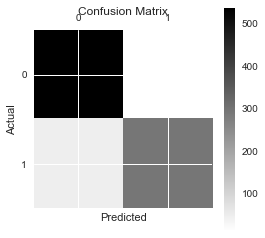

In [146]:
plot_confusion_matrix(df_confusion_RF_one)

**TP = 295 & TN = 537** for this Random-Forest with 100 DTs for 10 as Depth

In [147]:
print(df_confusion_one)
print(df_confusion_two)
print(df_confusion_three)

[[490  59]
 [ 99 243]]
[[500  49]
 [ 86 256]]
[[533  16]
 [ 72 270]]


**TP has been seen improved to 295** with this Random-Forest as compared to all standalone Decision-Tree Models

### 5.7) ROC - Reciver Operating Characteristics

In [152]:
fpr, tpr, _ = metrics.roc_curve(Y, pred_RF_one)

In [153]:
roc_auc = metrics.auc(fpr, tpr)

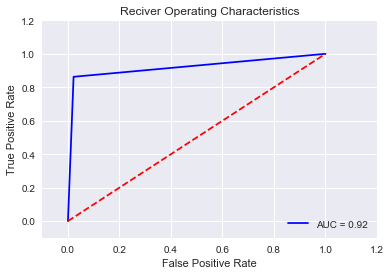

In [156]:
plt.title('Reciver Operating Characteristics')
plt.plot(fpr, tpr, color='blue', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**ROC curve on Predicted probabilities**

In [157]:
pred_RF_one_prob = my_forest_one.predict_proba(X)
#pred_RF_one_prob[:,1]
pred_RF_one_prob_df = pd.DataFrame(pred_RF_one_prob)
pred_RF_one_prob_df.head()

,0,1
0,0.865798,0.134202
1,0.000000,1.000000
2,0.399854,0.600146
3,0.009470,0.990530
4,0.929704,0.070296


In [192]:
pred_RF_one_prob_df[0:3]

,0,1
0,0.865798,0.134202
1,0.000000,1.000000
2,0.399854,0.600146


In [655]:
roc_auc = metrics.auc(fpr, tpr)

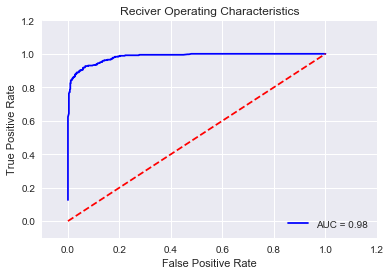

In [656]:
plt.title('Reciver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()